In [4]:
#pip install xgboost

In [5]:
#pip install gunicorn

In [6]:
#importing all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.figsize"]=10,7.5
plt.rcParams["axes.grid"]=True
plt.gray()


<Figure size 720x540 with 0 Axes>

In [7]:
#importing the data set

data=pd.read_csv("../given_data/Q6_data.csv")
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,603.4,-0.008,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,417.4,-0.025,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0


In [8]:
#data.describe()

In [9]:
#checking the type of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Columns: 152 entries, 0 to target
dtypes: float64(143), int64(9)
memory usage: 11.9 MB


In [10]:
data = data.astype("float")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Columns: 152 entries, 0 to target
dtypes: float64(152)
memory usage: 11.9 MB


<AxesSubplot:xlabel='target', ylabel='Density'>

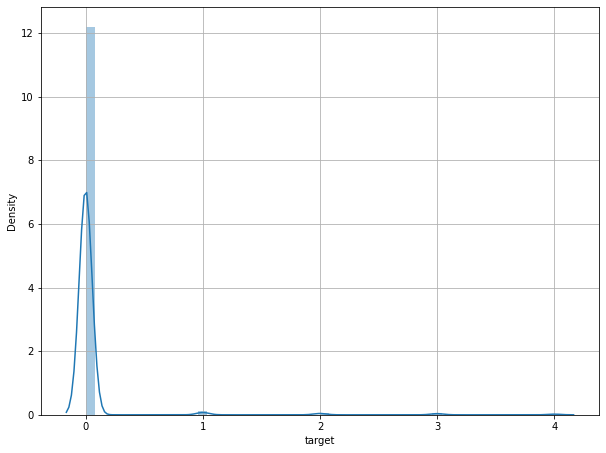

In [12]:
#checking the data distribution of target variable for each class

sns.distplot(data["target"])

In [13]:
data.isnull().sum().sort_values(ascending=False)

80        56
40        17
69        12
75         9
111        4
          ..
51         0
52         0
53         0
54         0
target     0
Length: 152, dtype: int64

In [14]:
class_0 = data[data.target == 0]

In [15]:
#Checking null value in each class

class_0.isnull().sum().sort_values(ascending=False)

80        55
40        17
69        12
75         9
111        3
          ..
51         0
52         0
53         0
54         0
target     0
Length: 152, dtype: int64

<AxesSubplot:xlabel='80', ylabel='Density'>

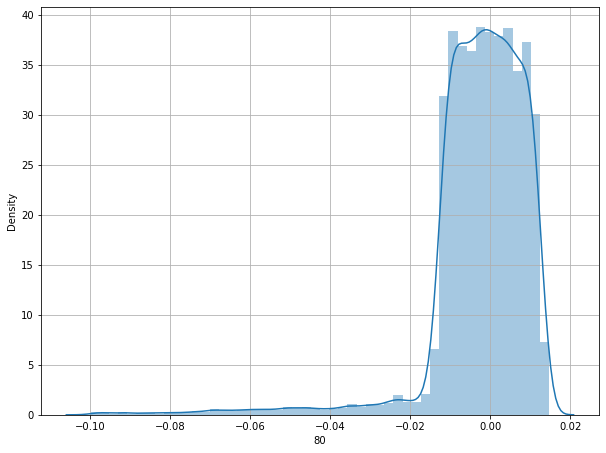

In [16]:
#class wise distribution of data for feature 80

sns.distplot(data["80"])

<AxesSubplot:xlabel='17', ylabel='Density'>

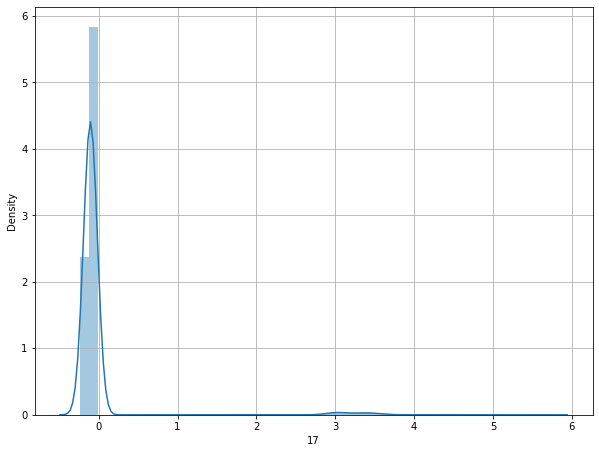

In [17]:
#class wise distribution of data for feature 17
sns.distplot(data["17"])

<AxesSubplot:xlabel='12', ylabel='Density'>

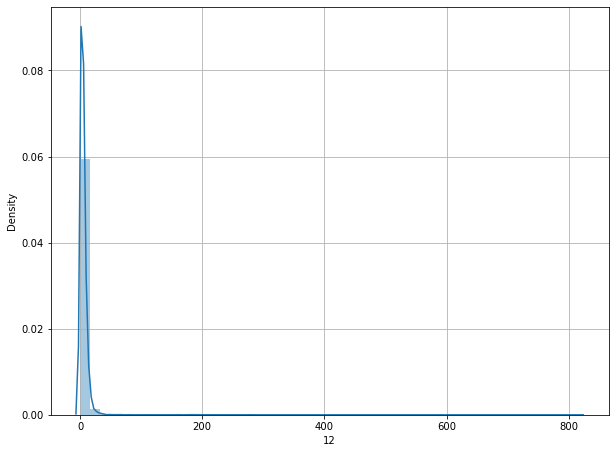

In [18]:
#class wise distribution of data for feature 12

sns.distplot(data["12"])

<AxesSubplot:xlabel='9', ylabel='Density'>

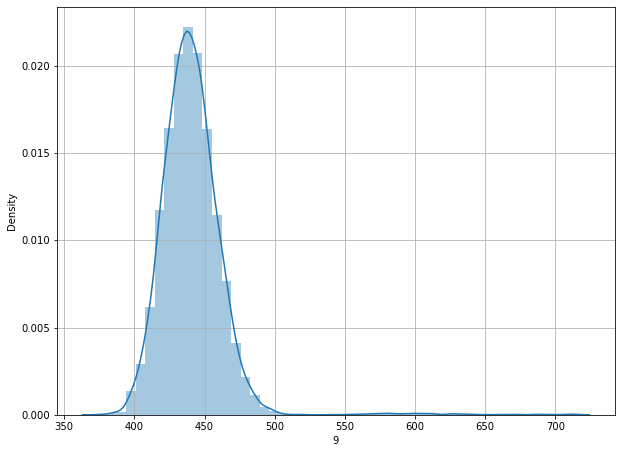

In [19]:
#class wise distribution of data for feature 9

sns.distplot(data["9"])

<AxesSubplot:xlabel='4', ylabel='Density'>

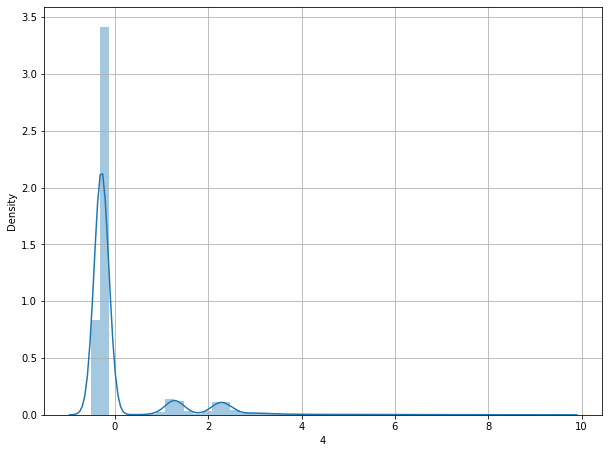

In [20]:
#class wise distribution of data for feature 4

sns.distplot(data["4"])

In [21]:
class_0.shape

(10000, 152)

In [22]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean().round(1), inplace=True)

In [23]:
data.isnull().sum().sort_values(ascending=False)

0         0
104       0
97        0
98        0
99        0
         ..
51        0
52        0
53        0
54        0
target    0
Length: 152, dtype: int64

In [24]:
# defining function for data audit report:-

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [25]:
#Data description

data.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
0,10241.0,0.0,1310.616099,0.127977,-0.055867,2.018572,4.074632,-5.480920,-2.035705,-1.468409,-1.199527,-0.710242,-0.055867,0.694998,1.308277,1.694052,3.647899,57.246035
1,10241.0,0.0,-187.930000,-0.018351,-0.113000,0.597846,0.357419,-0.442000,-0.400000,-0.277000,-0.246000,-0.179000,-0.113000,-0.076000,-0.062000,1.100000,2.777000,8.995000
2,10241.0,0.0,-464.272000,-0.045335,-0.261000,0.637736,0.406707,-0.647000,-0.396000,-0.370000,-0.341000,-0.303000,-0.261000,-0.196000,1.227000,1.485000,2.524000,5.757000
3,10241.0,0.0,-167.973000,-0.016402,-0.028000,0.953677,0.909500,-2.989000,-2.070000,-1.487000,-1.263000,-0.773000,-0.028000,0.648000,1.242000,1.553000,2.121200,3.446000
4,10241.0,0.0,758.413000,0.074057,-0.282000,0.960843,0.923220,-0.517000,-0.401000,-0.344000,-0.338000,-0.310000,-0.282000,-0.239000,1.373000,2.298000,3.827000,9.443000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,10241.0,0.0,-2006.341540,-0.195913,-0.188750,0.016852,0.000284,-0.225480,-0.224100,-0.222980,-0.221430,-0.215400,-0.188750,-0.181530,-0.178010,-0.176860,-0.175764,-0.174830
148,10241.0,0.0,-1229.198230,-0.120027,-0.120090,0.006041,0.000036,-0.134270,-0.130880,-0.129400,-0.128270,-0.125170,-0.120090,-0.114890,-0.111790,-0.110590,-0.109074,-0.105990
149,10241.0,0.0,515.189195,0.050307,0.050065,0.007461,0.000056,0.021371,0.033724,0.038611,0.041145,0.045284,0.050065,0.054958,0.059765,0.062744,0.069375,0.109032
150,10241.0,0.0,178731.857800,17.452579,17.453900,0.309245,0.095633,16.488000,16.773000,16.949300,17.050700,17.244000,17.453900,17.659600,17.838600,17.930100,18.158780,19.577500


In [ ]:
# #Corellation among the features to see the dependency among themselves.

features = data.columns.to_list()
correlation = data[features].corr()
plt.figure(figsize = (20,20))
sns.set(font_scale=1)
sns.heatmap(correlation, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=features, yticklabels=features)
plt.show();

In [ ]:
#Feature set

feature_set = data.drop("target", axis = 1).columns.to_list()

In [ ]:
len(feature_set)

In [ ]:
# Creation of training /test sets

train_x, test_x, train_y, test_y = train_test_split(data[feature_set], data.target, random_state=42, stratify=data.target)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

In [ ]:
#Scaling the data as the range varry's for each features.

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
#shape of the training data to see the 25%, 75% division

train_x.shape, test_x.shape

In [ ]:
#Rendom forest classifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)            
rf_model.fit(train_x, train_y)

In [ ]:
#providing class weight for each xgboost algo

classes_weights = class_weight.compute_sample_weight(class_weight = 'balanced', y = data.target)

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit( train_x, train_y)

In [ ]:
#Predictions

pred_y = rf_model.predict(test_x)


In [ ]:
pred_y1 = xgb_model.predict(test_x)

In [ ]:
#confusion matrix for RFC

confusion = confusion_matrix(test_y, pred_y)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, pred_y)))

print('Micro Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_y, pred_y, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, pred_y, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, pred_y, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_y, pred_y, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


In [ ]:
#confusion matrix for XGBoost

confusion = confusion_matrix(test_y, pred_y1)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, pred_y1)))

print('Micro Precision: {:.2f}'.format(precision_score(test_y, pred_y1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_y, pred_y1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y1, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_y, pred_y1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_y, pred_y1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_y, pred_y1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, pred_y1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, pred_y1, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_y, pred_y1, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


In [ ]:
data[feature_set].columns.to_list

In [ ]:
rf_model.feature_importances_.shape

In [ ]:
n_estimators = [10, 100, 500]
max_depth = [5, 8, 25, 30]
min_samples_split = [ 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_x, train_y)
best_rf_model = bestF.best_estimator_
pred_y_best = best_rf_model.predict(test_x)

In [ ]:
#Hyperparameter tuning for finding the  confusion matrix for Best RF Model through Grid search

confusion = confusion_matrix(test_y, pred_y_best)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, pred_y_best)))

print('Micro Precision: {:.2f}'.format(precision_score(test_y, pred_y_best, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_y, pred_y_best, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y_best, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_y, pred_y_best, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_y, pred_y_best, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y_best, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_y, pred_y_best, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, pred_y_best, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, pred_y_best, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_y, pred_y_best, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


In [ ]:
hyperxgb = {"learning_rate"    : [0.05, 0.10],
 "max_depth"        : [ 5, 10],
 "min_child_weight" : [ 1, 5 ],
 "gamma"            : [ 0.1, 0.3 ],
 "colsample_bytree" : [ 0.3, 0.5 ],
 "n_estimators"     : [300,500],
           
             
}


gridxgb = GridSearchCV(xgb_model, hyperxgb, scoring = 'roc_auc', cv = 3, verbose = True)
bestxgb = gridxgb.fit(train_x, train_y)
best_rf_model = bestxgb.best_estimator_
pred_y1_best = best_rf_model.predict(test_x)


In [ ]:
#Hyperparameter tuning for finding the confusion matrix for Best XGB Model

confusion = confusion_matrix(test_y, pred_y1_best)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, pred_y1_best)))

print('Micro Precision: {:.2f}'.format(precision_score(test_y, pred_y1_best, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_y, pred_y1_best, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y1_best, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_y, pred_y1_best, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_y, pred_y1_best, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_y, pred_y1_best, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_y, pred_y1_best, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, pred_y1_best, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, pred_y1_best, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_y, pred_y1_best, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))

In [ ]:
feature_imp=pd.DataFrame({"var": data[feature_set].columns.to_list(),"importance":rf_model.feature_importances_}).sort_values(["importance"],ascending=False)

In [ ]:
plt.title('Feature Importance')
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(train_x.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_x.shape[1]),  data[feature_set].columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# save the model to disk
path = "../prediction_service/model"
filename = path + 'finalized_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
 


In [ ]:
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)